In [5]:
from catboost import CatBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:

# Load data
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

X = df.drop('Target', axis=1)
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize and fit model
model = CatBoostRegressor(verbose=0)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.8492011667520589
MSE: 0.19760814499635423


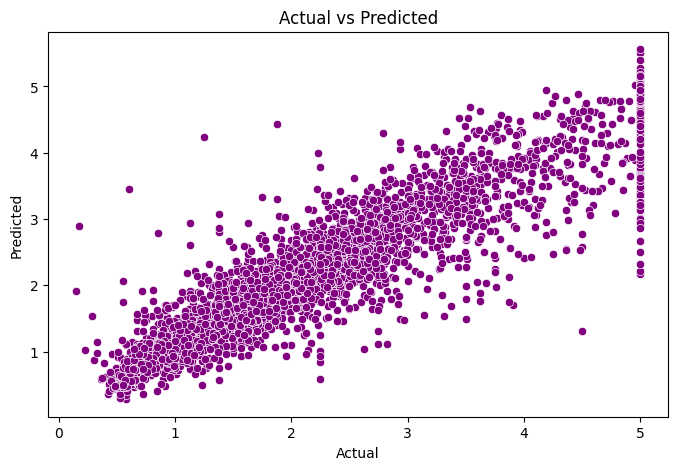

In [8]:
# Plot predictions
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred,color='purple')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()